# Unified Cellular Neighborhood Detection

This notebook runs the unified cellular neighborhood (CN) detection pipeline across multiple tiles.

## Key Features:
- Loads multiple tiles into a unified dataset
- Performs k-means clustering on all cells together (default k=7 CNs)
- Generates ONE unified CN composition heatmap based on all tiles
- Generates individual spatial CN maps for EACH tile
- Saves processed h5ad files with CN annotations for spatial context analysis
- Calculates and visualizes neighborhood frequency distributions

## Workflow:
1. ✅ Configure parameters (tiles directory, k, n_clusters, etc.)
2. ✅ Initialize detector and discover tiles
3. ✅ Run full pipeline (load → build graph → aggregate → cluster → visualize → save)
4. ✅ Analyze results and view visualizations


## Step 1: Import Required Libraries


In [ ]:
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add the current directory to path to import the module
sys.path.insert(0, str(Path.cwd()))

from cn_unified_kmeans import UnifiedCellularNeighborhoodDetector
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## Step 2: Configure Parameters

Set the paths and parameters for your analysis.


In [ ]:
# ⚠️ UPDATE THESE PATHS AND PARAMETERS FOR YOUR ANALYSIS

# Directory containing h5ad tile files
TILES_DIRECTORY = "/mnt/j/HandE/results/SOW1885_n=201_AT2 40X/JN_TS_023/manual_4mm_5/selected_h5ad"
# Alternative paths (uncomment to use):
# TILES_DIRECTORY = "/mnt/c/ProgramData/github_repo/image_analysis_scripts/neighborhood_composition/spatial_contexts/selected_h5ad_tiles/processed_h5ad"
# TILES_DIRECTORY = "/mnt/j/GDC-TCGA-LUAD/00a0b174-1eab-446a-ba8c-7c6e3acd7f0c/pred/h5ad"

# Output directory for results
OUTPUT_DIR = "cn_unified_results"

# Analysis parameters
K_NEIGHBORS = 20  # Number of nearest neighbors for spatial graph
N_CLUSTERS = 7    # Number of cellular neighborhoods to detect
CELLTYPE_KEY = "cell_type"  # Column name for cell types
RANDOM_STATE = 220705  # Random seed for reproducibility

# Optional: Limit number of tiles for testing (set to None to process all)
MAX_TILES = None  # e.g., 5 for quick testing

# File pattern to match
FILE_PATTERN = "*.h5ad"

# Spatial coordinate offsetting
COORD_OFFSET = True  # Set to False to disable coordinate offsetting between tiles

print("Configuration:")
print(f"  Tiles directory: {TILES_DIRECTORY}")
print(f"  Output directory: {OUTPUT_DIR}")
print(f"  k (nearest neighbors): {K_NEIGHBORS}")
print(f"  n_clusters (CNs): {N_CLUSTERS}")
print(f"  Cell type key: {CELLTYPE_KEY}")
print(f"  Max tiles: {MAX_TILES if MAX_TILES else 'All'}")
print(f"  Coordinate offset: {COORD_OFFSET}")


Configuration:
  Tiles directory: /mnt/j/HandE/results/SOW1885_n=201_AT2 40X/JN_TS_023/manual_3mm_9/selected_h5ad
  Output directory: cn_unified_results
  k (nearest neighbors): 20
  n_clusters (CNs): 7
  Cell type key: cell_type
  Max tiles: All
  Coordinate offset: True


## Step 3: Initialize Detector and Discover Tiles


In [14]:
# Initialize the unified CN detector
detector = UnifiedCellularNeighborhoodDetector(
    tiles_directory=TILES_DIRECTORY,
    output_dir=OUTPUT_DIR
)

# Discover tile files
tile_files = detector.discover_tiles(pattern=FILE_PATTERN, max_tiles=MAX_TILES)

if not tile_files:
    print("❌ No tiles found! Please check the TILES_DIRECTORY path.")
else:
    print(f"\n✅ Found {len(tile_files)} tile(s) to process")
    print("\nFirst few tiles:")
    for i, tile_file in enumerate(tile_files[:5], 1):
        print(f"  {i}. {tile_file.name}")
    if len(tile_files) > 5:
        print(f"  ... and {len(tile_files) - 5} more")


Discovering tiles in: /mnt/j/HandE/results/SOW1885_n=201_AT2 40X/JN_TS_023/manual_3mm_9/selected_h5ad
Found 9 tile files

✅ Found 9 tile(s) to process

First few tiles:
  1. tile_16926_22613.h5ad
  2. tile_20891_49667.h5ad
  3. tile_36435_45097.h5ad
  4. tile_46316_60182.h5ad
  5. tile_52035_12356.h5ad
  ... and 4 more


## Step 4: Run Full Pipeline

This will execute all steps:
1. Load and combine tiles
2. Build k-nearest neighbor graph
3. Aggregate neighbors by cell type
4. Detect cellular neighborhoods using k-means
5. Compute unified CN composition
6. Generate visualizations (heatmap + individual tile maps)
7. Save processed h5ad files
8. Save summary statistics

##### The whole process might take several minutes.

In [ ]:
# Run the complete pipeline
if tile_files:
    detector.run_full_pipeline(
        tile_files=tile_files,
        k=K_NEIGHBORS,
        n_clusters=N_CLUSTERS,
        celltype_key=CELLTYPE_KEY,
        random_state=RANDOM_STATE,
        coord_offset=COORD_OFFSET
    )
    
    print("\n✅ Pipeline completed successfully!")
    
    # Display the unified CN composition heatmap
    from IPython.display import Image, display
    heatmap_path = Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_composition_heatmap.png'
    if heatmap_path.exists():
        print("\n📊 Unified CN Composition Heatmap:")
        display(Image(str(heatmap_path)))
else:
    print("❌ Cannot run pipeline: No tiles found")


UNIFIED CELLULAR NEIGHBORHOOD DETECTION PIPELINE
Processing 9 tiles with unified CN detection
Parameters: k=20, n_clusters=7

Loading and combining 9 tiles...
  [1/9] Loading: tile_16926_22613
    ✓ Loaded 34011 cells, 1 genes
  [2/9] Loading: tile_20891_49667
    ✓ Loaded 12360 cells, 1 genes
  [3/9] Loading: tile_36435_45097
    ✓ Loaded 36416 cells, 1 genes
  [4/9] Loading: tile_46316_60182
    ✓ Loaded 69473 cells, 1 genes
  [5/9] Loading: tile_52035_12356
    ✓ Loaded 43462 cells, 1 genes
  [6/9] Loading: tile_66217_49382
    ✓ Loaded 40176 cells, 1 genes
  [7/9] Loading: tile_66625_28823
    ✓ Loaded 35818 cells, 1 genes
  [8/9] Loading: tile_82594_17065
    ✓ Loaded 41071 cells, 1 genes
  [9/9] Loading: tile_83231_38843
    ✓ Loaded 43123 cells, 1 genes

Combining tiles into single dataset...
✓ Combined dataset: 355910 cells, 1 genes
  Tiles: 9
  Cell types: 7

Building unified 20-NN graph across all tiles...
  ✓ Average neighbors per cell: 20.00
  ✓ Connectivity matrix shape: (

## Step 5: Calculate and Visualize Neighborhood Frequency

Calculate the frequency distribution of cellular neighborhoods and create visualizations.



Calculating neighborhood frequency...
  ✓ Calculated overall CN frequency
    Total cells: 355,910

Overall CN Frequency:
  Cellular_Neighborhood  Count  Percentage
0                     1  24558        6.90
1                     2  42529       11.95
2                     3  46261       13.00
3                     4  66988       18.82
4                     5  70208       19.73
5                     6  66955       18.81
6                     7  38411       10.79

Generating neighborhood frequency graph...

Calculating neighborhood frequency...
  ✓ Calculated overall CN frequency
    Total cells: 355,910
  ✓ Saved frequency graph to: cn_unified_results/unified_analysis/neighborhood_frequency_overall.png
  ✓ Saved frequency data to: cn_unified_results/unified_analysis/neighborhood_frequency.csv

📊 Neighborhood Frequency (Overall):


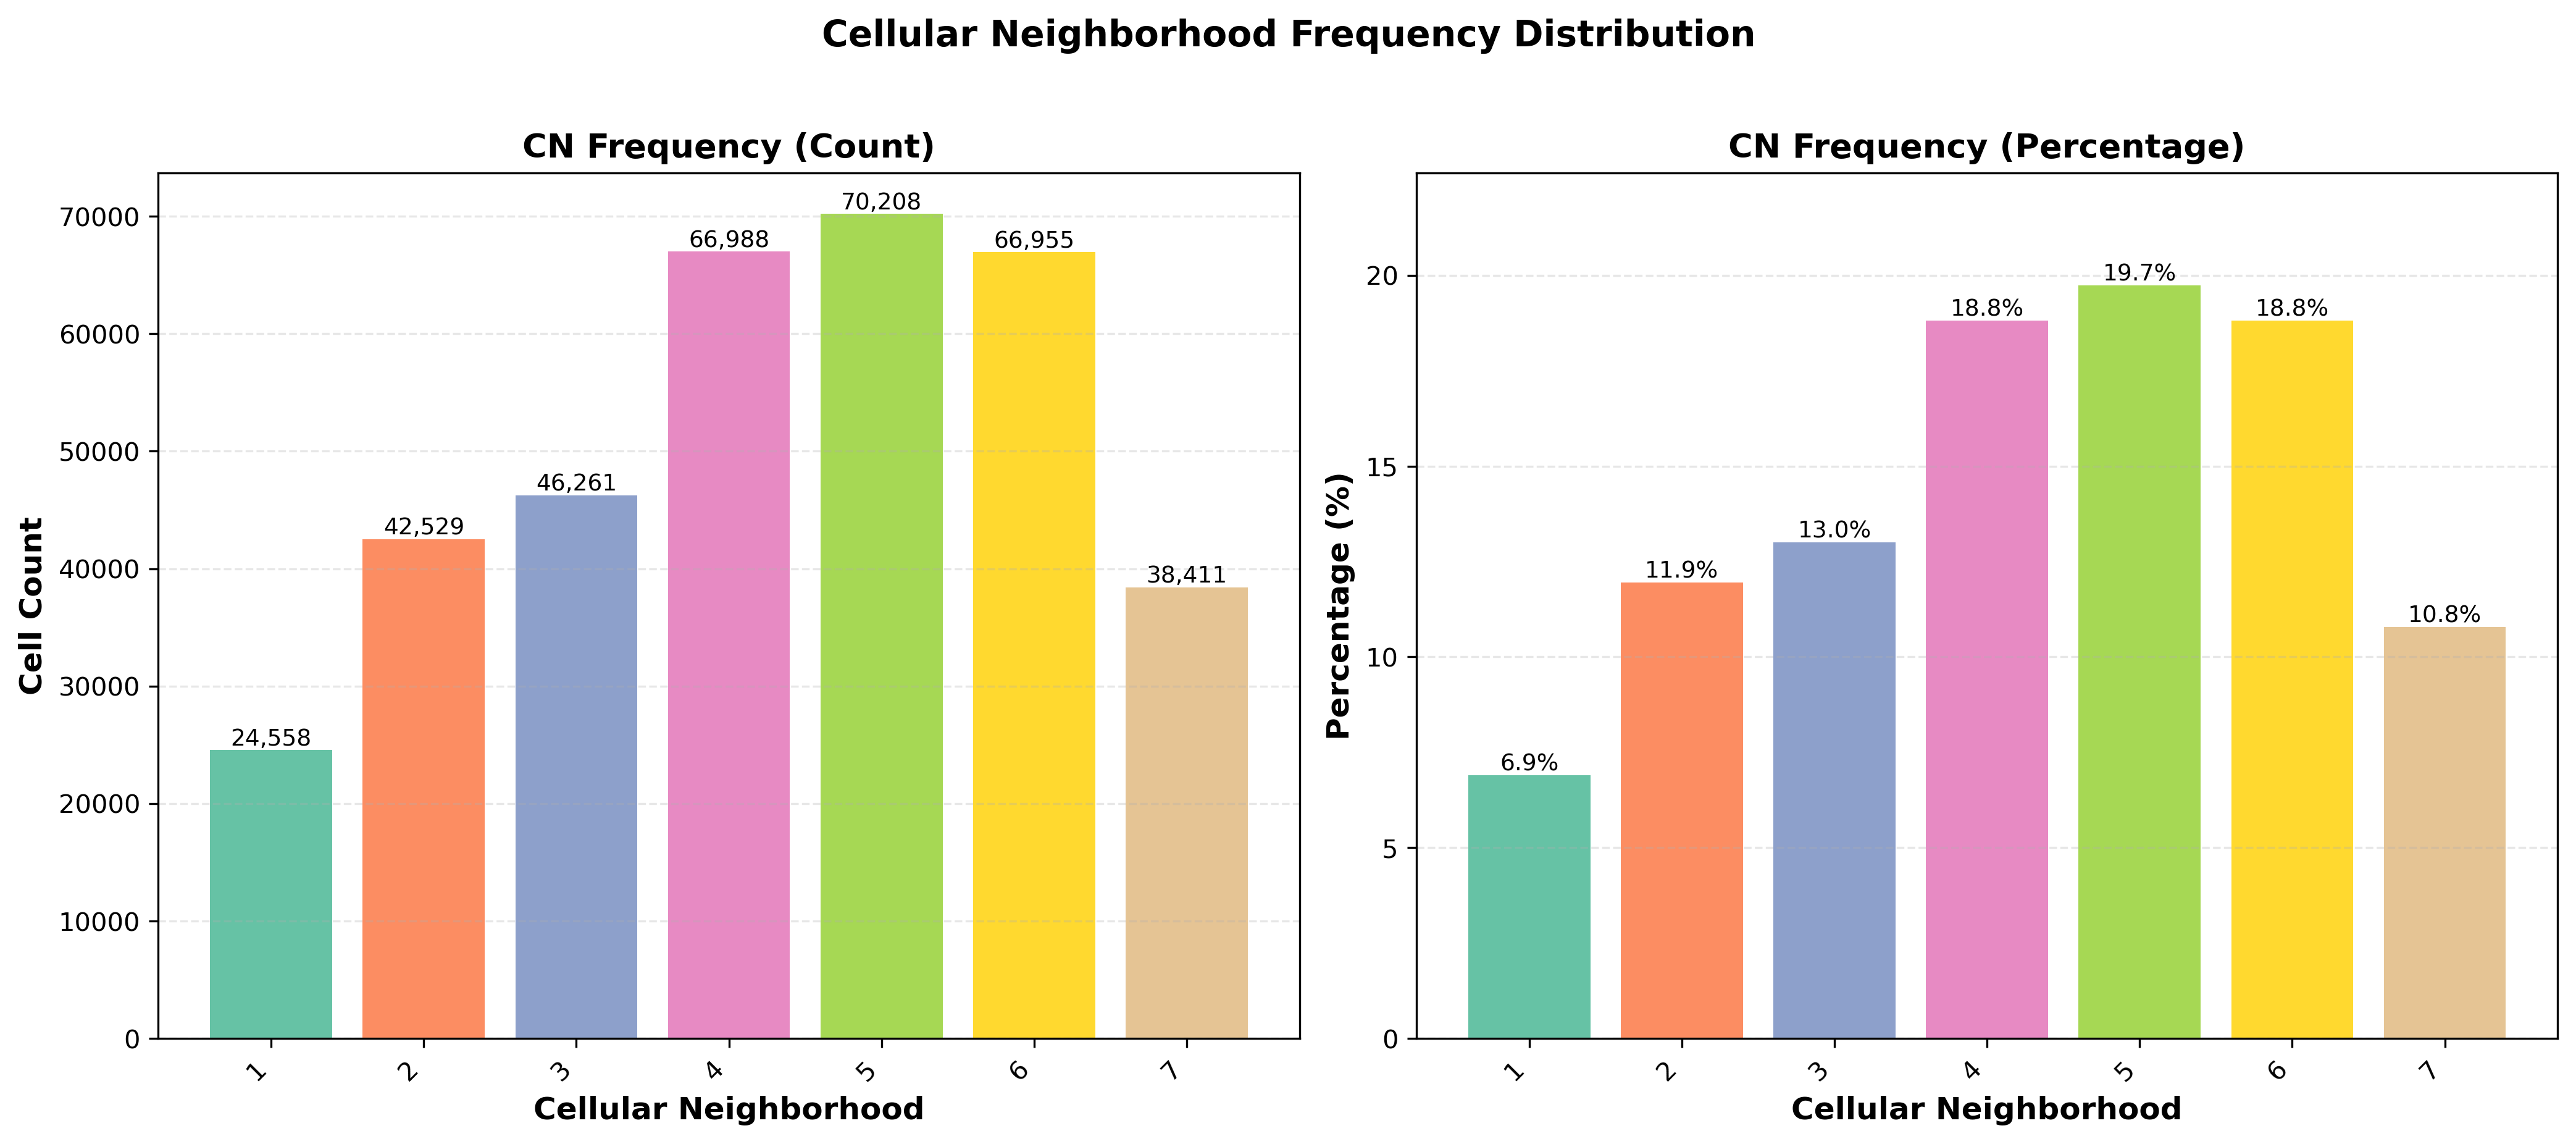

In [19]:
# Calculate overall neighborhood frequency
overall_frequency = detector.calculate_neighborhood_frequency(
    cn_key='cn_celltype',
    group_by_tile=False
)

print("\nOverall CN Frequency:")
print(overall_frequency)

# Visualize overall frequency
overall_freq_path = Path(OUTPUT_DIR) / 'unified_analysis' / 'neighborhood_frequency_overall.png'
fig = detector.visualize_neighborhood_frequency(
    cn_key='cn_celltype',
    group_by_tile=False,
    figsize=(14, 6),
    save_path=str(overall_freq_path)
)

# Display the saved image in the notebook
from IPython.display import Image, display
if overall_freq_path.exists():
    print("\n📊 Neighborhood Frequency (Overall):")
    display(Image(str(overall_freq_path)))



Calculating neighborhood frequency...
  ✓ Calculated CN frequency per tile

CN Frequency per Tile:
cn_celltype              1         2         3         4         5         6  \
tile_name                                                                      
tile_16926_22613  0.026080  0.283202  0.434918  0.028726  0.001676  0.140190   
tile_20891_49667  0.080987  0.658819  0.013673  0.143689  0.017799  0.084061   
tile_36435_45097  0.042783  0.030783  0.156991  0.130382  0.428768  0.210072   
tile_46316_60182  0.189815  0.034042  0.189009  0.042549  0.038648  0.151239   
tile_52035_12356  0.097533  0.143804  0.041323  0.264277  0.128710  0.216419   
tile_66217_49382  0.010653  0.213834  0.085997  0.354515  0.031561  0.211818   
tile_66625_28823  0.057373  0.019711  0.003406  0.402842  0.426294  0.081272   
tile_82594_17065  0.000000  0.011565  0.009958  0.257262  0.624845  0.091208   
tile_83231_38843  0.027897  0.121652  0.154674  0.134661  0.089001  0.427104   

cn_celltype        

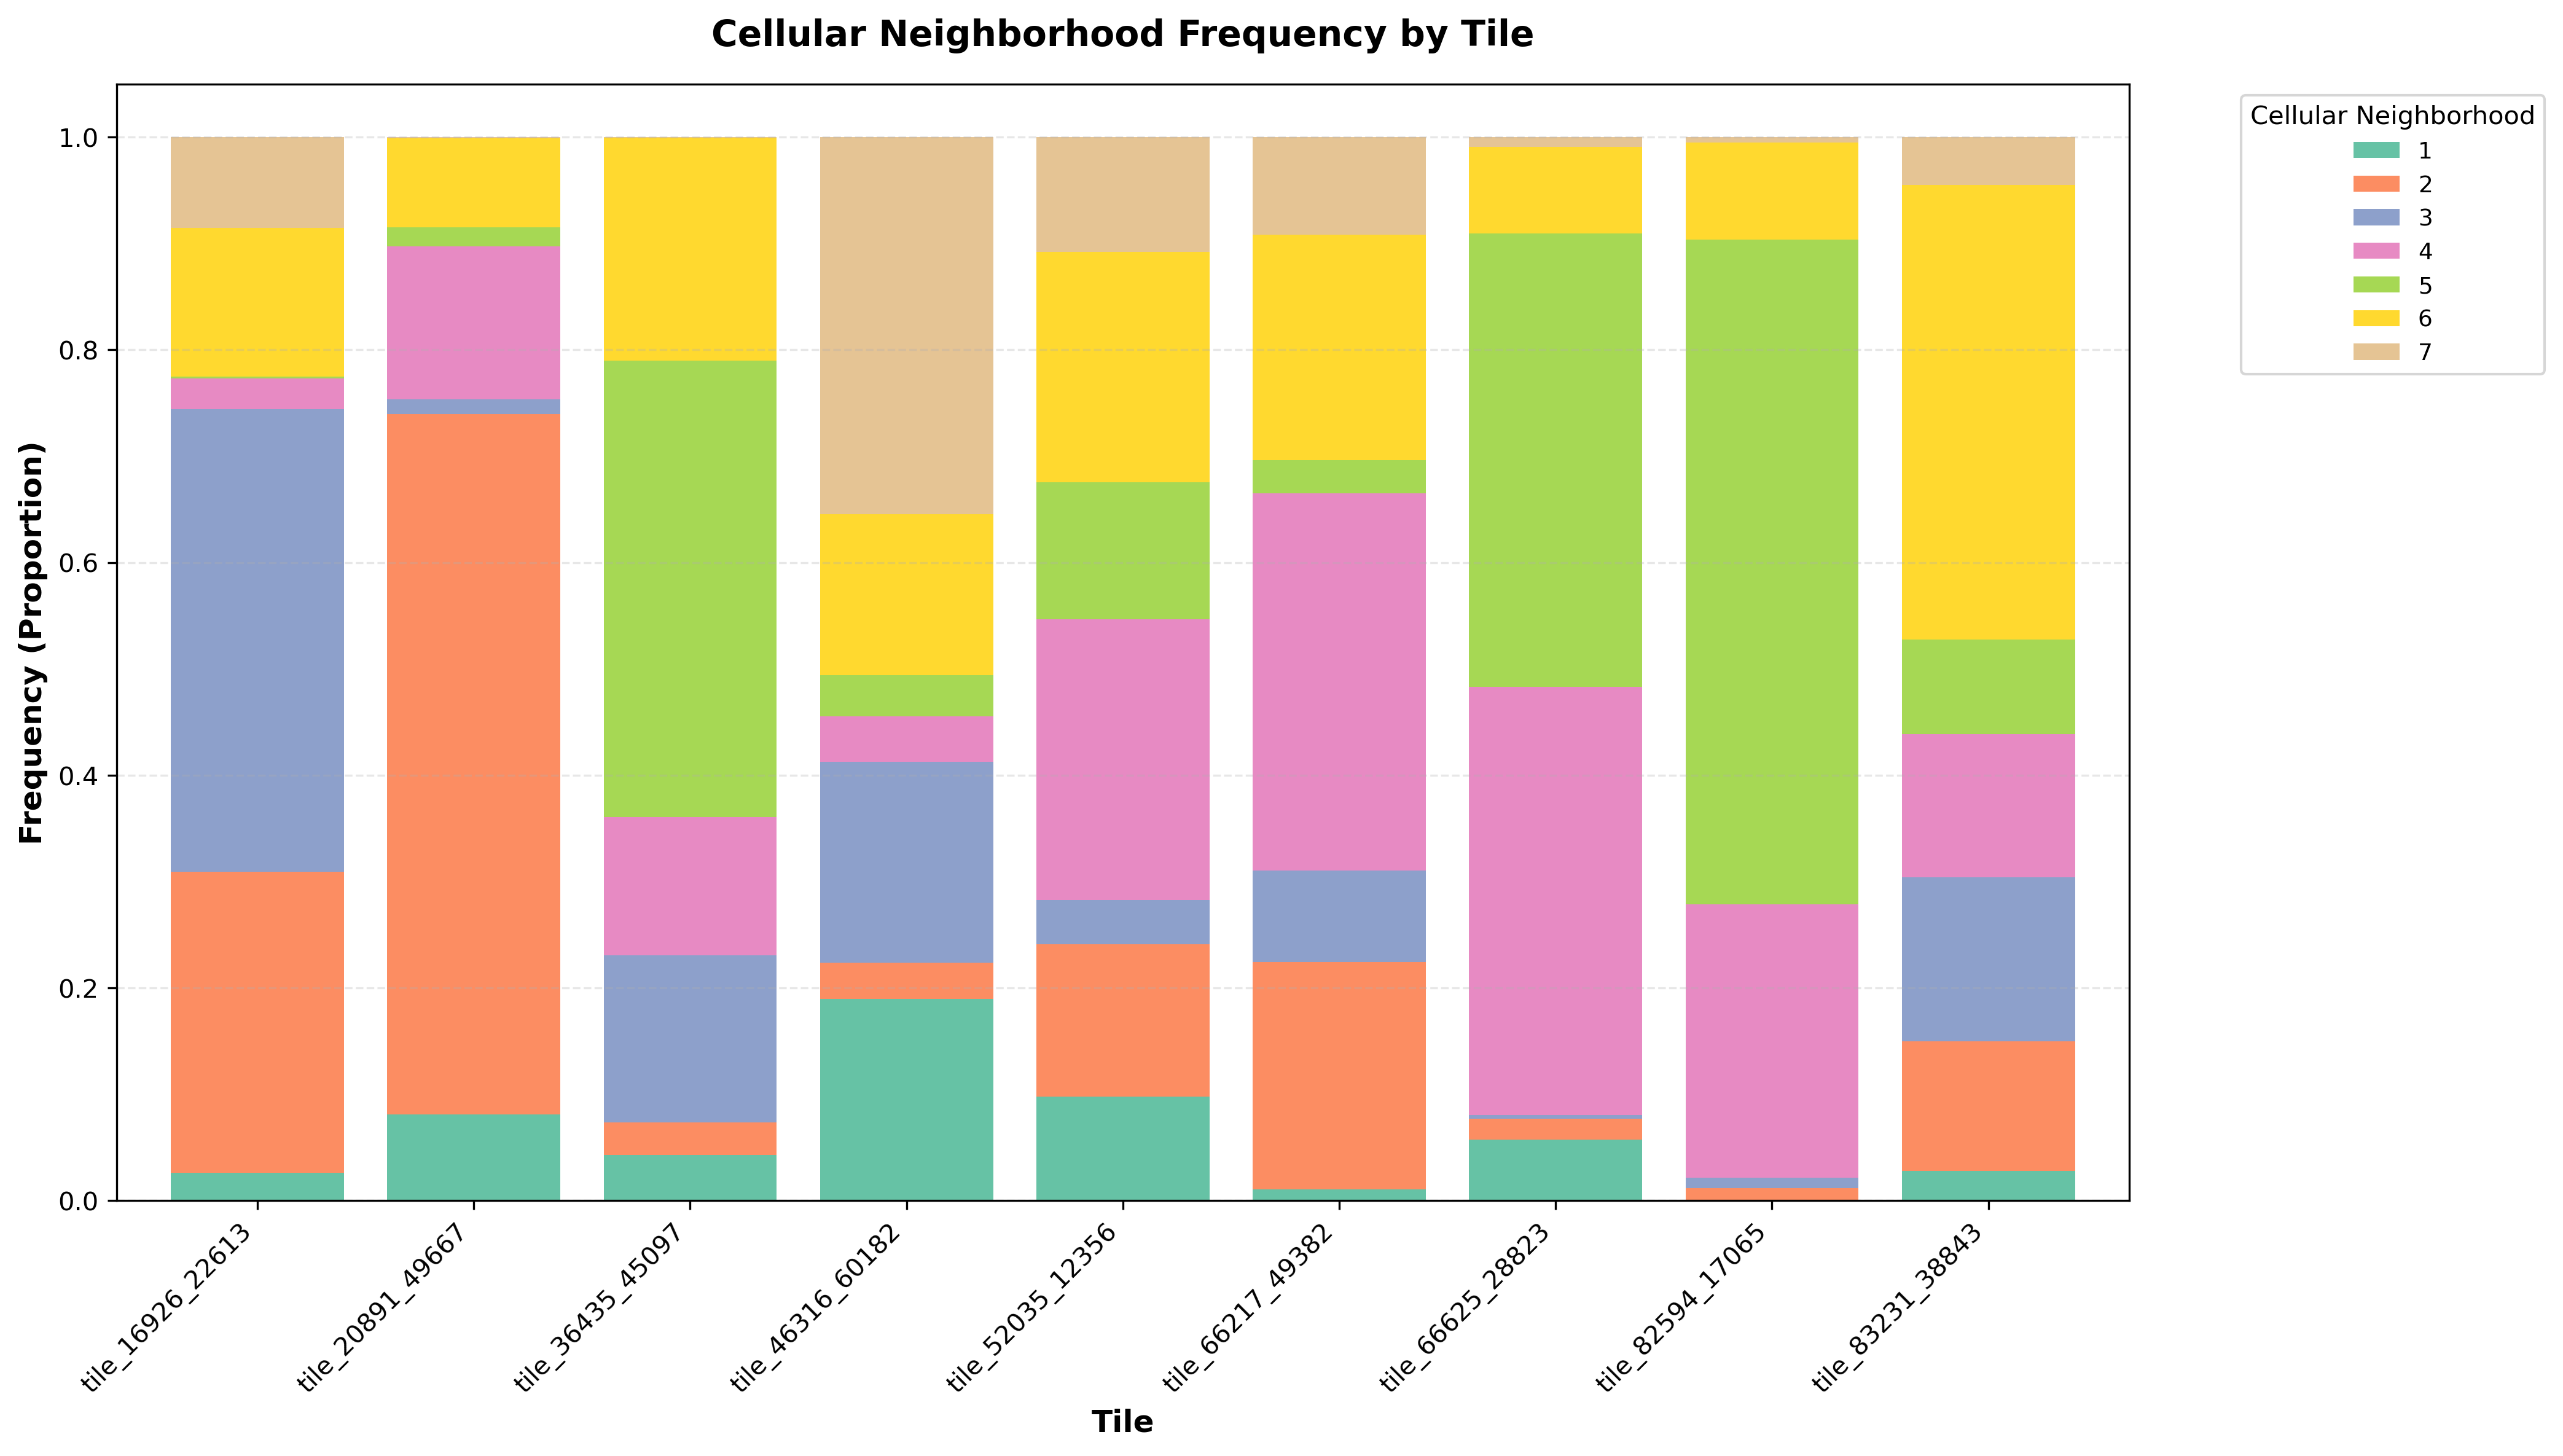

In [25]:
# Calculate frequency per tile (for comparison across tiles)
per_tile_frequency = detector.calculate_neighborhood_frequency(
    cn_key='cn_celltype',
    group_by_tile=True
)

print("\nCN Frequency per Tile:")
print(per_tile_frequency)

# Visualize frequency per tile
per_tile_freq_path = Path(OUTPUT_DIR) / 'unified_analysis' / 'neighborhood_frequency_per_tile.png'
fig = detector.visualize_neighborhood_frequency(
    cn_key='cn_celltype',
    group_by_tile=True,
    figsize=(14, 8),
    save_path=str(per_tile_freq_path)
)

# Display the saved image in the notebook
from IPython.display import Image, display
if per_tile_freq_path.exists():
    print("\n📊 Neighborhood Frequency (Per Tile):")
    display(Image(str(per_tile_freq_path)))


## Step 6: View Results Summary

Display summary statistics and file locations.


In [22]:
# Load and display summary statistics
import json

summary_path = Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_summary.json'
if summary_path.exists():
    with open(summary_path, 'r') as f:
        summary = json.load(f)
    
    print("=" * 80)
    print("ANALYSIS SUMMARY")
    print("=" * 80)
    print(f"\nAnalysis Type: {summary['analysis_type']}")
    print(f"Number of Tiles: {summary['n_tiles']}")
    print(f"Total Cells: {summary['total_cells']:,}")
    print(f"Total Genes: {summary['total_genes']:,}")
    
    print(f"\nParameters:")
    for key, value in summary['parameters'].items():
        print(f"  {key}: {value}")
    
    print(f"\nCN Distribution:")
    for cn, count in sorted(summary['cn_distribution'].items(), key=lambda x: int(x[0])):
        pct = 100 * count / summary['total_cells']
        print(f"  CN {cn}: {count:,} cells ({pct:.1f}%)")
    
    print(f"\nCell Type Distribution:")
    for ct, count in sorted(summary['cell_type_distribution'].items(), key=lambda x: x[1], reverse=True)[:10]:
        pct = 100 * count / summary['total_cells']
        print(f"  {ct}: {count:,} cells ({pct:.1f}%)")
    
    print("\n" + "=" * 80)
else:
    print("❌ Summary file not found")


ANALYSIS SUMMARY

Analysis Type: Unified Cellular Neighborhoods
Number of Tiles: 9
Total Cells: 355,910
Total Genes: 1

Parameters:
  k_neighbors: 20
  n_clusters: 7
  random_state: 220705
  celltype_key: cell_type

CN Distribution:
  CN 1: 24,558 cells (6.9%)
  CN 2: 42,529 cells (11.9%)
  CN 3: 46,261 cells (13.0%)
  CN 4: 66,988 cells (18.8%)
  CN 5: 70,208 cells (19.7%)
  CN 6: 66,955 cells (18.8%)
  CN 7: 38,411 cells (10.8%)

Cell Type Distribution:
  Epithelium (PD-L1lo/Ki67lo): 87,105 cells (24.5%)
  Epithelium (PD-L1hi/Ki67hi): 85,844 cells (24.1%)
  Fibroblast/Stroma: 76,760 cells (21.6%)
  Macrophage: 39,671 cells (11.1%)
  Lymphocyte: 34,164 cells (9.6%)
  Vascular: 20,324 cells (5.7%)
  Undefined: 12,042 cells (3.4%)



In [23]:
# Display output file locations
print("\n📁 Output Files:")
print("=" * 80)
print(f"\n1. Unified Analysis:")
print(f"   - Heatmap: {Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_composition_heatmap.png'}")
print(f"   - Frequency (overall): {Path(OUTPUT_DIR) / 'unified_analysis' / 'neighborhood_frequency_overall.png'}")
print(f"   - Frequency (per tile): {Path(OUTPUT_DIR) / 'unified_analysis' / 'neighborhood_frequency_per_tile.png'}")
print(f"   - Summary JSON: {Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_summary.json'}")
print(f"   - Composition CSV: {Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_composition.csv'}")
print(f"   - Frequency CSV: {Path(OUTPUT_DIR) / 'unified_analysis' / 'neighborhood_frequency.csv'}")

print(f"\n2. Individual Tile Maps:")
print(f"   - Directory: {Path(OUTPUT_DIR) / 'individual_tiles'}")
print(f"   - Count: {len(list(Path(OUTPUT_DIR).glob('individual_tiles/spatial_cns_*.png')))} files")

print(f"\n3. Processed H5AD Files:")
print(f"   - Directory: {Path(OUTPUT_DIR) / 'processed_h5ad'}")
print(f"   - Count: {len(list(Path(OUTPUT_DIR).glob('processed_h5ad/*_adata_cns.h5ad')))} files")

print("\n" + "=" * 80)
print("✅ All results saved successfully!")
print("\n💡 Tip: The processed h5ad files are ready for spatial context analysis.")



📁 Output Files:

1. Unified Analysis:
   - Heatmap: cn_unified_results/unified_analysis/unified_cn_composition_heatmap.png
   - Frequency (overall): cn_unified_results/unified_analysis/neighborhood_frequency_overall.png
   - Frequency (per tile): cn_unified_results/unified_analysis/neighborhood_frequency_per_tile.png
   - Summary JSON: cn_unified_results/unified_analysis/unified_cn_summary.json
   - Composition CSV: cn_unified_results/unified_analysis/unified_cn_composition.csv
   - Frequency CSV: cn_unified_results/unified_analysis/neighborhood_frequency.csv

2. Individual Tile Maps:
   - Directory: cn_unified_results/individual_tiles
   - Count: 9 files

3. Processed H5AD Files:
   - Directory: cn_unified_results/processed_h5ad
   - Count: 9 files

✅ All results saved successfully!

💡 Tip: The processed h5ad files are ready for spatial context analysis.


## Step 7: (Optional) Load and Explore Results

You can load the saved data to perform additional analysis.


In [24]:
# Example: Load composition matrix for further analysis
composition_path = Path(OUTPUT_DIR) / 'unified_analysis' / 'unified_cn_composition.csv'
if composition_path.exists():
    composition_df = pd.read_csv(composition_path, index_col=0)
    print("CN Composition Matrix (first few rows):")
    print(composition_df.head())
    print(f"\nShape: {composition_df.shape}")
else:
    print("❌ Composition file not found")

# Example: Access the combined AnnData object
if detector.combined_adata is not None:
    print(f"\n✅ Combined AnnData available:")
    print(f"   - Cells: {detector.combined_adata.n_obs:,}")
    print(f"   - Genes: {detector.combined_adata.n_vars:,}")
    print(f"   - Observations: {list(detector.combined_adata.obs.columns)[:5]}...")
    print(f"   - CN labels stored in: 'cn_celltype' column")


CN Composition Matrix (first few rows):
             Undefined  Epithelium (PD-L1lo/Ki67lo)  \
cn_celltype                                           
1             0.019261                     0.051104   
2             0.047426                     0.091091   
3             0.026113                     0.090897   
4             0.037440                     0.199752   
5             0.028373                     0.636779   

             Epithelium (PD-L1hi/Ki67hi)  Macrophage  Lymphocyte  Vascular  \
cn_celltype                                                                  
1                               0.130100    0.154003    0.541901  0.027527   
2                               0.130523    0.105575    0.115803  0.214348   
3                               0.711960    0.055771    0.049783  0.018914   
4                               0.068445    0.082776    0.046322  0.065489   
5                               0.121553    0.024228    0.015639  0.013175   

             Fibroblast/Str